In [1]:
import pandas as pd

# searching Kaggle datasets with desired keywords

In [2]:
!kaggle datasets list -s "funko pop"

ref                             title               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------  -----------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/funko-pop-dataset  Funko Pop Dataset  364KB  2022-05-31 14:29:10            423         34  0.88235295       
irotem98/funko-pops             funko pops          20MB  2022-09-17 12:00:40             31          1  0.125            
irotem98/funkopop-humans        funko-pop_humans    87MB  2022-09-22 23:45:33              9          0  0.125            
irotem98/funko-pop-512          funko_pop_512      463MB  2023-09-19 20:35:58              3          0  0.125            


In [3]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
housing_pd = pd.read_csv('housing.csv')
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing_pd['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# shuffle the dataframe so the order of the data becomes randomized

housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


as the `ocean_proximity` column still consists of categorical data, convert it into some "One Hot Encoding" type of thing, as below:

In [7]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).astype(int).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [8]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [9]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity']).astype(int)], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


The column `median_house_value` will be moved over to far end right as the final column. 

Because then we can say the features/input (x) is going to be everything but the last column.  

The last column is the output (y).

In [10]:
housing_pd_final = housing_pd_final[["longitude", "latitude",
                                     "housing_median_age", "total_rooms",
                                     "total_bedrooms",	"population",
                                     "households", "median_income",
                                     "<1H OCEAN", "INLAND",
                                     "ISLAND",	"NEAR BAY",
                                     "NEAR OCEAN", "median_house_value"]]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [11]:
# remove all rows that have NaN values

housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [12]:
# split into training and validation dataset
# test out all the models and see which one has the lowest using validation dataset

In [13]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [14]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

# the main issue here is that the values in each column is on different scales

from sklearn.preprocessing import StandardScaler
# it standardizes the scale to a normal distribution
# only done for numerical data
# each value is subtracted by the mean value of that column, divided by the standard deviation

import numpy as np
scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [15]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

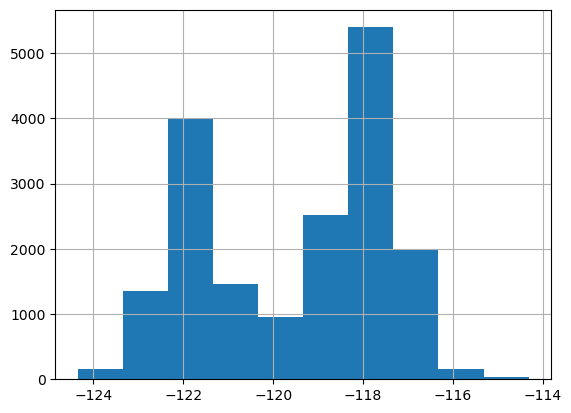

In [17]:
pd.DataFrame(X_train)[0].hist();

### Linear Regression

In [18]:
# measure each model's performance using a metric called 'Mean Squared Error'
# sum((y_hat(x) - y)²) / n
# y_hat: predicted value, y: real value

# the bigger it is, the worse the performance is
# which means the closer it is to zero (0), the better

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(68593.05578127236, 71382.43558330201)

above is the error value for the training and validation data.

if the validation data error is way way higher than the training data error,  
it's called 'over-fitting' where the model tries too hard to fit a particular dataset and not be able to be generalized into new results.

### KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(62893.251224541506, 106170.71436161106)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(86888.62732577053, 94660.255396805)

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(80502.41715537941, 80886.90921153306)

it doesn't overfit but the error of val data is relatively high so it doesn't do very well.

In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(52566.61207966007, 57483.75760502843)

### Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(47274.82259072157, 51218.70392709396)

## Using TensorFlow and Keras

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint 
# this is to save the best model with the lowest validation data loss

from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [29]:
simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30291996672.0000 - root_mean_squared_error: 172903.7188 - val_loss: 15613314048.0000 - val_root_mean_squared_error: 124953.2500
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 12957323264.0000 - root_mean_squared_error: 113755.4219 - val_loss: 11466692608.0000 - val_root_mean_squared_error: 107082.6406
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10880180224.0000 - root_mean_squared_error: 104304.0469 - val_loss: 11180339200.0000 - val_root_mean_squared_error: 105737.1250
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 10574965760.0000 - root_mean_squared_error: 102833.0859 - val_loss: 10787652608.0000 - val_root_mean_squared_error: 103863.6250
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10040177664.0000 - root_mean_squared_error: 100194.9688 - val_loss: 10544841728.0000 - val_root_mean_squared_error: 102688.0781
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [30]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn.keras')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


(69425.66074629604, 72187.01244321048)

In [32]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 20303613952.0000 - root_mean_squared_error: 140300.6875 - val_loss: 9666516992.0000 - val_root_mean_squared_error: 98318.4453
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - loss: 8718909440.0000 - root_mean_squared_error: 93267.5859 - val_loss: 6970083328.0000 - val_root_mean_squared_error: 83487.0234
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 6115054592.0000 - root_mean_squared_error: 78183.6719 - val_loss: 5577881600.0000 - val_root_mean_squared_error: 74685.2188
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5760327680.0000 - root_mean_squared_error: 75873.7734 - val_loss: 5586600960.0000 - val_root_mean_squared_error: 74743.5703
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - loss: 5781392896.0000 - root_mean_squared_error: 76013.6875 - val_loss: 5931919360.0000 - val_root_mean_squared_error: 77018.9531
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 5076

In [35]:
from tensorflow.keras.models import load_model

medium_nn = load_model('models/medium_nn.keras')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


(62086.43000428492, 64361.07153720807)

In [34]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 20376240128.0000 - root_mean_squared_error: 140212.3438 - val_loss: 9877571584.0000 - val_root_mean_squared_error: 99385.9766
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8787127296.0000 - root_mean_squared_error: 93720.0625 - val_loss: 6430599680.0000 - val_root_mean_squared_error: 80191.0234
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7194368512.0000 - root_mean_squared_error: 84782.9141 - val_loss: 8743481344.0000 - val_root_mean_squared_error: 93506.5859
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6231502336.0000 - root_mean_squared_error: 78908.0078 - val_loss: 6101884416.0000 - val_root_mean_squared_error: 78114.5625
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5783648768.0000 - root_mean_squared_error: 76029.0625 - val_loss: 6929595392.0000 - val_root_mean_squared_error: 83244.1875
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5384321536.0

In [36]:
from tensorflow.keras.models import load_model

large_nn = load_model('models/large_nn.keras')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


(65481.945268974305, 67352.28602533997)

In [37]:
mse(gbr.predict(X_test), y_test, squared=False)

49276.99748031798